# Exploratory Data Analysis of Building Permits data set.

The dataset comes from the City of Raleigh Open Data website and is based upon pending/granted building permits.

# Data Import and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [2]:
df1 = pd.read_csv("https://s3.amazonaws.com/cc-analytics-datasets/Building_Permits.csv",low_memory=False)
df1.shape

(141953, 87)

In [3]:
### Loading the dataset takes some time, so make a local copy if we have to use it again in future
df = df1
df1.head()

,X,Y,OBJECTID,permittypemapped,permitnum,workclass,permitclass,proposedworkdescription,permitclassmapped,applieddate,...,totalsqft,voiddate,workclassmapped,GlobalID,CreationDate,Creator,EditDate,Editor,const_type,occupancyclass
0,-78.734835,35.903045,48520,Building,147303,Alterations/repairs,434.0,REPAIR FIRE DAMAGE,Residential,2018-03-02T18:12:31.000Z,...,2064.0,NaN,Existing,e94cf493-fe7f-49d6-927f-b6127a3435b6,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2018-06-15T22:03:10.675Z,OpenData_ral,V B,RESIDENT 3 SFD/DUP
1,-78.534184,35.729309,48521,Building,147288,New Building,101.0,SFD,Residential,2018-03-02T15:16:37.000Z,...,1684.0,NaN,New,f114dc19-3b62-459b-bd6c-9084162403c8,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2018-06-12T22:02:31.949Z,OpenData_ral,V B,RESIDENT 3 SFD/DUP
2,-78.534323,35.728595,48522,Building,147287,New Building,101.0,SFD,Residential,2018-03-02T15:08:25.000Z,...,2378.0,NaN,New,d4b182cb-af25-4c3f-92a9-a59d4b82ada3,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2018-06-13T22:02:40.102Z,OpenData_ral,V B,RESIDENT 3 SFD/DUP
3,-78.531789,35.729794,48523,Building,147286,New Building,101.0,NEW SFD,Residential,2018-03-02T15:00:47.000Z,...,1392.0,NaN,New,ecc76e8c-48d3-4529-a7ae-f1d616592c08,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2018-06-27T22:02:34.320Z,OpenData_ral,V B,RESIDENT 3 SFD/DUP
4,-78.533914,35.729473,48524,Building,147284,New Building,101.0,NEW SFD,Residential,2018-03-02T14:32:33.000Z,...,1392.0,NaN,New,a1074b43-bc40-4efa-bc7f-a167c351c327,2018-03-16T01:55:55.663Z,justin.greco@raleighnc.gov_ral,2018-06-12T22:02:31.949Z,OpenData_ral,V B,RESIDENT 3 SFD/DUP


In [4]:
### Drop columns that have only one distinct value in them
for column in df.columns:
    if len(df[column].unique()) <= 1:
        print(column)
        df.drop(column,inplace= True, axis= 1)

constcompletedofficial
expirednewpermnum
jurisdiction
permittype
publisher


Removing all the date columns as they are not needed for analysis

In [5]:
df = df.loc[:, ~df.columns.str.endswith('date')]
df.shape

(141953, 75)

## Exploratory Data Analysis (EDA)

Standard Deviation with respect to mean for X and Y coordinates of permit issued

In [6]:
df[['X','Y']].describe().T[['mean','std']]

,mean,std
X,-78.635798,0.068805
Y,35.835300,0.058392


## Plots
Plot the distributions for each of the following features: Estimated Project Cost and Issue Date Month

## 1. Estimated Project Cost

In [7]:
df.estprojectcost.describe().astype('int')

count       141953
mean        192012
std        1493678
min              0
25%          10000
50%          54404
75%         135000
max      170000000
Name: estprojectcost, dtype: int32

Since the standard deviation is much higher for estimated project cost, the data is not centered around mean
hence we possibly should check for outliers

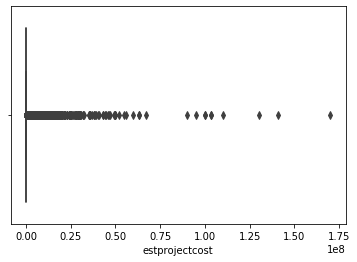

In [9]:
import seaborn as sns
sns.boxplot(df.estprojectcost)

As the box width is very small and all other values on the right hand side are treated as outliers, we shall remove
the outliers and plot histogram


Calculating Interquartile range and removing outliers

In [10]:
IQR = df.estprojectcost.describe()['75%'] - df.estprojectcost.describe()['25%']
IQR1_5 = 1.5*IQR

In [11]:
estprojectcost = df[(df.estprojectcost <= (df.estprojectcost.describe()['75%'] + IQR1_5)) & 
                    (df.estprojectcost >= (df.estprojectcost.describe()['25%'] - IQR1_5))].estprojectcost.astype('int')
print("Original length with outliers : " + str(len(df.estprojectcost)) + "\n" + "Length after removing outliers : " + str(len(estprojectcost)))

Original length with outliers : 141953
Length after removing outliers : 129902


Summmary Statistics after removing outliers

In [12]:
estprojectcost.describe().astype('int')

count    129902
mean      69692
std       76569
min           0
25%        8000
50%       38797
75%      108500
max      322461
Name: estprojectcost, dtype: int32

## 2. Issuedate-month

In [13]:
issueddatemthdf = df.groupby(['issueddate_mth']).count()['permitnum'].reset_index()
issueddatemthdf

,issueddate_mth,permitnum
0,1.0,9915
1,2.0,9646
2,3.0,12189
3,4.0,12508
4,5.0,13498
5,6.0,13897
6,7.0,12239
7,8.0,13285
8,9.0,11648
9,10.0,11486
